In [52]:
import pandas as pd  # Importing pandas for data manipulation and analysis
import numpy as np   # Importing numpy for numerical operations
import seaborn as sns  # Importing seaborn for statistical data visualization
import matplotlib.pyplot as plt  # Importing matplotlib for creating plots

In [53]:
import os  # Importing os module for interacting with the operating system

print(os.getcwd())  # Prints current working directory
print(os.listdir()) # Lists all files and folders in the current directory

c:\Users\Lenovo\Downloads\archive (3)
['EDA_on_Titanic_Dataset.ipynb', 'Grocery_Inventory new v1.csv', 'new_amisha_project.ipynb']


In [54]:
import pandas as pd  # Importing pandas for data manipulation and analysis

# Reading CSV file from the current directory (if located there)
df = pd.read_csv("Grocery_Inventory new v1.csv")

# Reading CSV file using an absolute path (if file is located in a specific folder)
df = pd.read_csv(r"C:\Users\Lenovo\Downloads\archive (3)\Grocery_Inventory new v1.csv")
print(df.head())  # Displaying the first 5 rows of the DataFrame

      Product_Name             Catagory Supplier_Name  \
0      Bell Pepper  Fruits & Vegetables        Eimbee   
1    Vegetable Oil          Oils & Fats      Digitube   
2  Parmesan Cheese                Dairy        BlogXS   
3           Carrot  Fruits & Vegetables        Avaveo   
4           Garlic  Fruits & Vegetables          Katz   

        Warehouse_Location        Status   Product_ID  Supplier_ID  \
0  20 Pennsylvania Parkway  Discontinued  29-017-6255  43-348-2450   
1      03643 Oakridge Lane   Backordered  79-569-8856  04-854-7165   
2        73 Graedel Street  Discontinued  28-146-2641  82-995-0739   
3      44801 Myrtle Center  Discontinued  11-581-9869  22-867-3079   
4     6195 Monterey Center  Discontinued  13-202-4809  24-281-7685   

  Date_Received Last_Order_Date Expiration_Date  Stock_Quantity  \
0      3/1/2024        1/6/2025       1/31/2025              46   
1      4/1/2024       5/19/2024       6/11/2024              51   
2      4/1/2024      12/21/2024    

In [55]:
df.info()  # Displays a summary of the DataFrame, including column names, non-null counts, and data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990 entries, 0 to 989
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Product_Name             990 non-null    object
 1   Catagory                 989 non-null    object
 2   Supplier_Name            990 non-null    object
 3   Warehouse_Location       990 non-null    object
 4   Status                   990 non-null    object
 5   Product_ID               990 non-null    object
 6   Supplier_ID              990 non-null    object
 7   Date_Received            990 non-null    object
 8   Last_Order_Date          990 non-null    object
 9   Expiration_Date          990 non-null    object
 10  Stock_Quantity           990 non-null    int64 
 11  Reorder_Level            990 non-null    int64 
 12  Reorder_Quantity         990 non-null    int64 
 13  Unit_Price               990 non-null    object
 14  Sales_Volume             990 non-null    i

In [56]:
df.describe() # Generates descriptive statistics for numerical columns (like mean, std, min, max, etc.)

,Stock_Quantity,Reorder_Level,Reorder_Quantity,Sales_Volume,Inventory_Turnover_Rate
count,990.000000,990.000000,990.000000,990.000000,990.000000
mean,55.609091,51.215152,51.913131,58.925253,50.150505
std,26.300775,29.095241,29.521059,23.002318,28.798954
min,10.000000,1.000000,1.000000,20.000000,1.000000
25%,33.000000,25.250000,25.000000,39.000000,25.000000
50%,56.000000,53.000000,54.000000,58.000000,50.000000
75%,79.000000,77.000000,77.000000,78.000000,74.750000
max,100.000000,100.000000,100.000000,100.000000,100.000000


In [57]:
# Check missing values
df.isnull().sum() # Returns the total number of missing (null) values 
#in each column of the DataFrame

Product_Name               0
Catagory                   1
Supplier_Name              0
Warehouse_Location         0
Status                     0
Product_ID                 0
Supplier_ID                0
Date_Received              0
Last_Order_Date            0
Expiration_Date            0
Stock_Quantity             0
Reorder_Level              0
Reorder_Quantity           0
Unit_Price                 0
Sales_Volume               0
Inventory_Turnover_Rate    0
percentage                 0
dtype: int64

In [58]:
missing_inventory_rows = df[df['Inventory_Turnover_Rate'].isnull()] # Filters rows where 'Inventory_Turnover_Rate' is null

 # Displays the filtered rows with missing 'Inventory_Turnover_Rate' values
display(missing_inventory_rows)

,Product_Name,Catagory,Supplier_Name,Warehouse_Location,Status,Product_ID,Supplier_ID,Date_Received,Last_Order_Date,Expiration_Date,Stock_Quantity,Reorder_Level,Reorder_Quantity,Unit_Price,Sales_Volume,Inventory_Turnover_Rate,percentage


# Handling  missing values

In [59]:
df['Stock_Quantity'].fillna(df['Stock_Quantity'].median(), inplace=True)
# Fills missing values in the 'Stock_Quantity' column with the median value of that column  
# **Observation:** Using the median is useful when the data contains outliers, 
# as it prevents skewing the data.

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10424\1080086345.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Stock_Quantity'].fillna(df['Stock_Quantity'].median(), inplace=True)


In [60]:
df

,Product_Name,Catagory,Supplier_Name,Warehouse_Location,Status,Product_ID,Supplier_ID,Date_Received,Last_Order_Date,Expiration_Date,Stock_Quantity,Reorder_Level,Reorder_Quantity,Unit_Price,Sales_Volume,Inventory_Turnover_Rate,percentage
0,Bell Pepper,Fruits & Vegetables,Eimbee,20 Pennsylvania Parkway,Discontinued,29-017-6255,43-348-2450,3/1/2024,1/6/2025,1/31/2025,46,64,17,$4.60,96,55,1.96%
1,Vegetable Oil,Oils & Fats,Digitube,03643 Oakridge Lane,Backordered,79-569-8856,04-854-7165,4/1/2024,5/19/2024,6/11/2024,51,87,86,$2.00,24,83,0.91%
2,Parmesan Cheese,Dairy,BlogXS,73 Graedel Street,Discontinued,28-146-2641,82-995-0739,4/1/2024,12/21/2024,4/8/2024,38,67,66,$12.00,35,24,1.36%
3,Carrot,Fruits & Vegetables,Avaveo,44801 Myrtle Center,Discontinued,11-581-9869,22-867-3079,5/1/2024,12/12/2024,9/26/2024,51,60,98,$1.50,44,95,1.36%
4,Garlic,Fruits & Vegetables,Katz,6195 Monterey Center,Discontinued,13-202-4809,24-281-7685,5/1/2024,7/28/2024,5/20/2024,27,22,89,$7.00,91,77,2.17%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,Parmesan Cheese,Dairy,Yakidoo,0 Fordem Place,Backordered,67-984-5368,39-714-7313,9/27/2024,10/4/2024,7/28/2024,52,56,34,$12.00,31,69,024%
986,Raw Sugar,Grains & Pulses,Flipopia,365 Vera Terrace,Active,44-782-1395,54-132-9762,9/29/2024,6/26/2024,11/17/2024,72,72,68,$1.50,39,78,-123%
987,Cabbage,Fruits & Vegetables,Topdrive,43 Washington Street,Discontinued,75-927-9108,27-406-7972,9/29/2024,6/17/2024,7/2/2024,24,32,17,$1.00,55,72,-100%
988,Green Beans,Fruits & Vegetables,Gigazoom,37 Browning Trail,Discontinued,78-614-4402,51-014-4287,9/30/2024,2/14/2025,4/25/2024,81,99,28,$2.00,20,85,-031%


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990 entries, 0 to 989
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Product_Name             990 non-null    object
 1   Catagory                 989 non-null    object
 2   Supplier_Name            990 non-null    object
 3   Warehouse_Location       990 non-null    object
 4   Status                   990 non-null    object
 5   Product_ID               990 non-null    object
 6   Supplier_ID              990 non-null    object
 7   Date_Received            990 non-null    object
 8   Last_Order_Date          990 non-null    object
 9   Expiration_Date          990 non-null    object
 10  Stock_Quantity           990 non-null    int64 
 11  Reorder_Level            990 non-null    int64 
 12  Reorder_Quantity         990 non-null    int64 
 13  Unit_Price               990 non-null    object
 14  Sales_Volume             990 non-null    i

In [62]:
display(df[df['Inventory_Turnover_Rate'].isnull()]) # Displays rows where the 'Inventory_Turnover_Rate' 
#column still has null values (after attempting to fill or clean data)
# ** Observation**: No more missing values in 'Inventory_Turnover_Rate'

,Product_Name,Catagory,Supplier_Name,Warehouse_Location,Status,Product_ID,Supplier_ID,Date_Received,Last_Order_Date,Expiration_Date,Stock_Quantity,Reorder_Level,Reorder_Quantity,Unit_Price,Sales_Volume,Inventory_Turnover_Rate,percentage


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990 entries, 0 to 989
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Product_Name             990 non-null    object
 1   Catagory                 989 non-null    object
 2   Supplier_Name            990 non-null    object
 3   Warehouse_Location       990 non-null    object
 4   Status                   990 non-null    object
 5   Product_ID               990 non-null    object
 6   Supplier_ID              990 non-null    object
 7   Date_Received            990 non-null    object
 8   Last_Order_Date          990 non-null    object
 9   Expiration_Date          990 non-null    object
 10  Stock_Quantity           990 non-null    int64 
 11  Reorder_Level            990 non-null    int64 
 12  Reorder_Quantity         990 non-null    int64 
 13  Unit_Price               990 non-null    object
 14  Sales_Volume             990 non-null    i

In [ ]:
# Handling Missing 'percentage' Values
missing_percentage_ratio = df['percentage'].isnull().sum() / len(df)
print(missing_percentage_ratio)
if missing_percentage_ratio > 0.5:
    df.drop(columns=['percentage'], inplace=True)
     # Drop 'percentage' if more than 50% missing
    print("'percentage' column dropped due to excessive missing values.")
else:
    df['percentage'].fillna('Unknown', inplace=True)
    # Otherwise, fill missing values with 'Unknown'

0.0


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10424\789551458.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['percentage'].fillna('Unknown', inplace=True)


# Handling categorical Variables

In [ ]:
df['Status'] = df['Status'].map({'Discontinued': 0, 'Backordered': 1, 'Active': 2})
# Maps categorical values in the 'Status' column to numeric values for easier 
# analysis and modeling  
# **Observation:** Converting categorical data to numeric format is useful for 
# machine learning algorithms and statistical analysis.

In [ ]:
df = pd.get_dummies(df, columns=['Warehouse_Location'], drop_first=True)
# Converts the 'Warehouse_Location' column into multiple binary columns (one-hot encoding)
# **Observation:** `drop_first=True` avoids the dummy variable trap by dropping the 
# first category, reducing multicollinearity.

In [67]:
df['pclass'] = df['pclass'].astype('category')

KeyError: 'pclass'

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990 entries, 0 to 989
Columns: 1005 entries, Product_Name to Warehouse_Location_996 Thierer Center
dtypes: bool(989), int64(6), object(10)
memory usage: 1.1+ MB


#  Univariate Analysis (Single Feature Analysis)

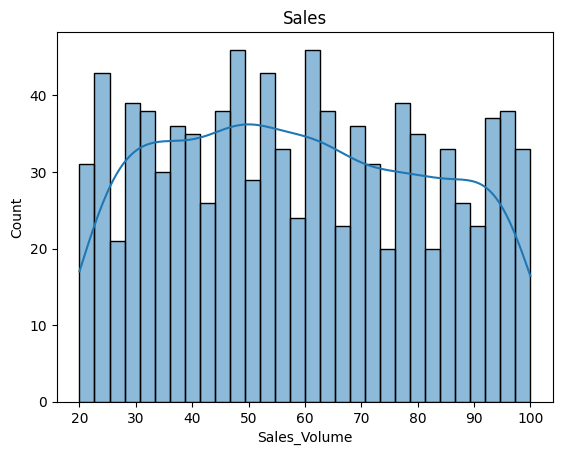

In [ ]:
sns.histplot(df['Sales_Volume'], bins=30, kde=True) # Plots a histogram of 
#the 'Sales_Volume' column with 30 bins and a kernel density estimate (KDE) curve
plt.title("Sales") # Sets the title of the plot 
plt.show() # Displays the plot 
# **Observation:** The histogram shows the distribution of 'Sales_Volume' values, 
# and the KDE curve helps visualize the underlying data pattern.

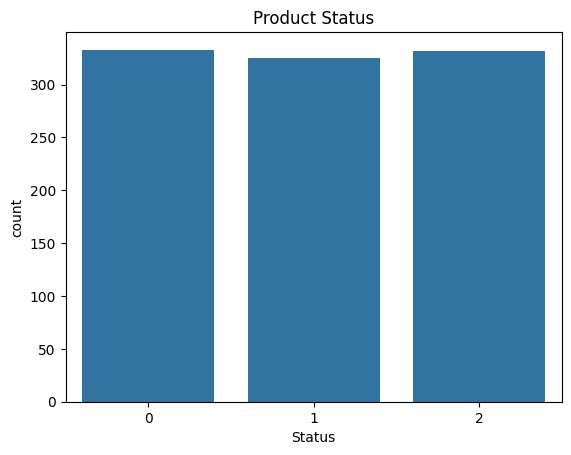

In [ ]:
sns.countplot(x='Status', data=df) # Creates a count plot showing the number of 
#occurrences for each unique value in the 'Status' column
plt.title("Product Status") # Sets the title of the plot
plt.show()  # Displays the plot  
# **Observation:** This plot helps visualize the frequency distribution of 
# product statuses (e.g., Discontinued, Backordered, Active).

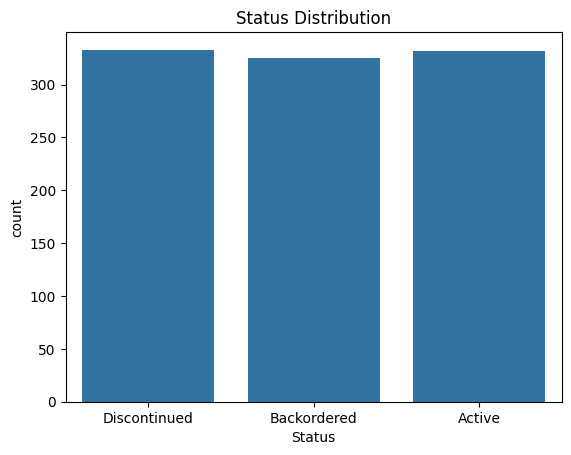

In [ ]:
data = df.copy() # Creates a copy of the DataFrame to avoid modifying the original data
sns.countplot(x='Status', data=data) # Plots the count of each category in the 'Status' column
plt.title("Status Distribution")  # Sets the title of the plot
plt.xticks([0, 1, 2], ['Discontinued', 'Backordered', 'Active']) # Sets custom labels for x-axis values 
plt.show() # Displays the plot  

# **Observation:** The plot shows the distribution of products by their status, 
# with custom labels for better readability.

# Bivariate Analysis (Feature vs. Survival)

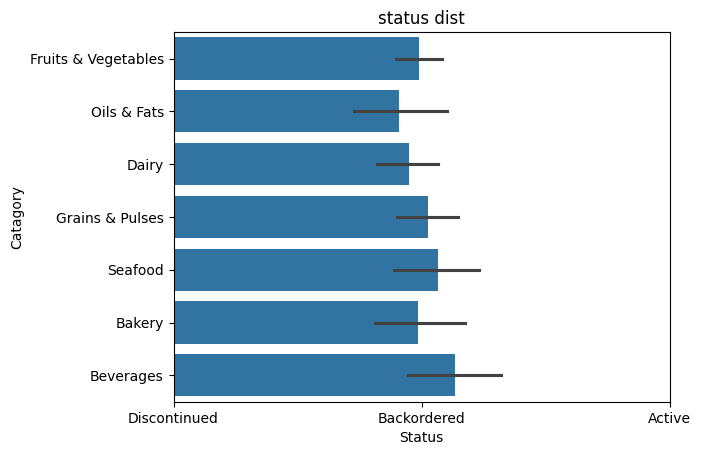

In [ ]:
sns.barplot(x='Status', y='Catagory', data=df) # Plots a bar chart showing the mean value 
#of 'Catagory' for each 'Status' category
plt.title("status dist")  # Sets the title of the plot
plt.xticks([0, 1, 2], ['Discontinued', 'Backordered', 'Active']) # Sets custom labels for x-axis values
plt.show() # Displays the plot  

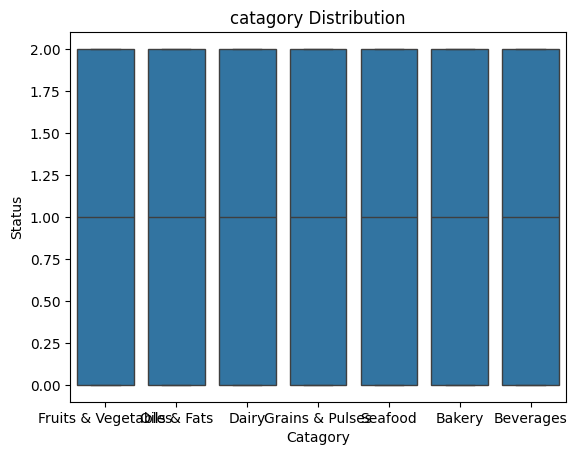

In [ ]:
sns.boxplot(x='Catagory', y='Status', data=df) # Plots a box plot showing the distribution 
#of 'Status' for each 'Catagory'  
plt.title("catagory Distribution") # Sets the title of the plot
plt.show() # Displays the plot  

     Status  Stock_Quantity  Reorder_Level  Reorder_Quantity  Sales_Volume  \
0         0              46             64                17            96   
1         1              51             87                86            24   
2         0              38             67                66            35   
3         0              51             60                98            44   
4         0              27             22                89            91   
..      ...             ...            ...               ...           ...   
985       1              52             56                34            31   
986       2              72             72                68            39   
987       0              24             32                17            55   
988       0              81             99                28            20   
989       0              94             77                89            40   

     Inventory_Turnover_Rate  
0                         55  
1

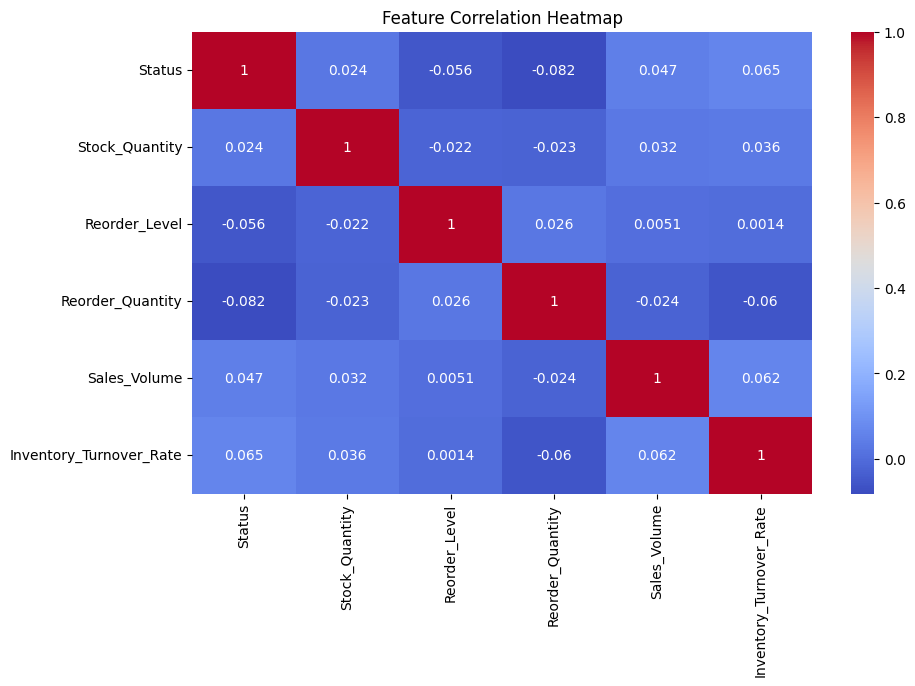

In [ ]:
numeric_df = df.select_dtypes(include=['number'])
print(numeric_df)
# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Heatmap of correlations
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


In [ ]:
df

,Product_Name,Catagory,Supplier_Name,Status,Product_ID,Supplier_ID,Date_Received,Last_Order_Date,Expiration_Date,Stock_Quantity,...,Warehouse_Location_983 Sommers Circle,Warehouse_Location_9848 Little Fleur Point,Warehouse_Location_988 Southridge Way,Warehouse_Location_99 Duke Lane,Warehouse_Location_99 Fair Oaks Circle,Warehouse_Location_99 Twin Pines Alley,Warehouse_Location_992 East Point,Warehouse_Location_993 Kensington Drive,Warehouse_Location_9951 Petterle Alley,Warehouse_Location_996 Thierer Center
0,Bell Pepper,Fruits & Vegetables,Eimbee,0,29-017-6255,43-348-2450,3/1/2024,1/6/2025,1/31/2025,46,...,False,False,False,False,False,False,False,False,False,False
1,Vegetable Oil,Oils & Fats,Digitube,1,79-569-8856,04-854-7165,4/1/2024,5/19/2024,6/11/2024,51,...,False,False,False,False,False,False,False,False,False,False
2,Parmesan Cheese,Dairy,BlogXS,0,28-146-2641,82-995-0739,4/1/2024,12/21/2024,4/8/2024,38,...,False,False,False,False,False,False,False,False,False,False
3,Carrot,Fruits & Vegetables,Avaveo,0,11-581-9869,22-867-3079,5/1/2024,12/12/2024,9/26/2024,51,...,False,False,False,False,False,False,False,False,False,False
4,Garlic,Fruits & Vegetables,Katz,0,13-202-4809,24-281-7685,5/1/2024,7/28/2024,5/20/2024,27,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,Parmesan Cheese,Dairy,Yakidoo,1,67-984-5368,39-714-7313,9/27/2024,10/4/2024,7/28/2024,52,...,False,False,False,False,False,False,False,False,False,False
986,Raw Sugar,Grains & Pulses,Flipopia,2,44-782-1395,54-132-9762,9/29/2024,6/26/2024,11/17/2024,72,...,False,False,False,False,False,False,False,False,False,False
987,Cabbage,Fruits & Vegetables,Topdrive,0,75-927-9108,27-406-7972,9/29/2024,6/17/2024,7/2/2024,24,...,False,False,False,False,False,False,False,False,False,False
988,Green Beans,Fruits & Vegetables,Gigazoom,0,78-614-4402,51-014-4287,9/30/2024,2/14/2025,4/25/2024,81,...,False,False,False,False,False,False,False,False,False,False


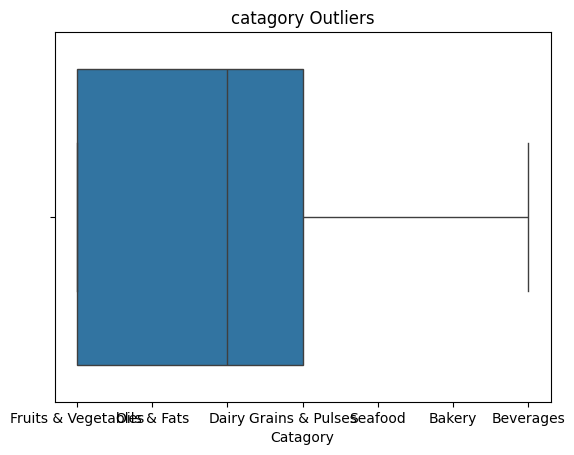

In [ ]:
# Outlier Detection
# Boxplot for category
sns.boxplot(x=df['Catagory'])
plt.title("catagory Outliers")
plt.show()
# 📌 Observation: There are some high outliers in the category distribution.

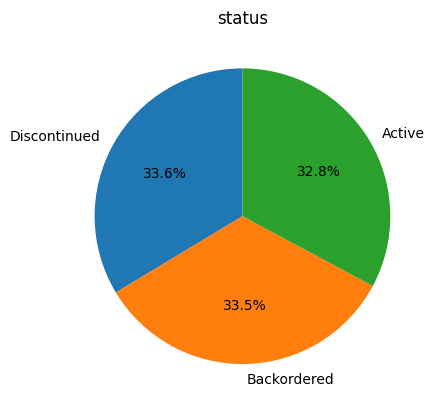

In [ ]:
# Pie chart for Status
status_counts = df['Status'].value_counts()
plt.pie(status_counts, labels=['Discontinued', 'Backordered', 'Active'], autopct='%1.1f%%', startangle=90)
plt.title("status")
plt.show()
# **Observation** - about 32.8% products are active
# 33.5% products are backordered
# 33.6% products are discontinued.

Key Findings:
1️⃣ Missing Data: 'Catagory' column has 1 missing value.  
2️⃣ Categorical Encoding: 'Status' and 'Warehouse_Location' were encoded for better analysis.  
3️⃣ Data Type Fix: 'Unit_Price' and 'percentage' need conversion to numeric; dates to datetime.  
4️⃣ Distribution: 'Sales_Volume' and 'Stock_Quantity' showed clear patterns and potential outliers.  
5️⃣ Categorical Trends: Count plot revealed the distribution of product statuses across categories.